In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()
from IPython.display import display

In [2]:
df = pd.read_csv('Emission.csv')

In [3]:
display(df.head())

,Year-Month,CO2 Emission
0,1973-Jan,106.363
1,1973-Feb,101.760
2,1973-Mar,110.553
3,1973-Apr,104.734
4,1973-May,114.897


In [4]:
display(df.tail())

,Year-Month,CO2 Emission
481,2013-Feb,134.243
482,2013-Mar,153.078
483,2013-Apr,149.442
484,2013-May,156.356
485,2013-Jun,152.814


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year-Month    486 non-null    object 
 1   CO2 Emission  486 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.7+ KB


In [8]:
Date = pd.date_range(start='1973-Jan', periods=486, freq='M')
Date

DatetimeIndex(['1973-01-31', '1973-02-28', '1973-03-31', '1973-04-30',
               '1973-05-31', '1973-06-30', '1973-07-31', '1973-08-31',
               '1973-09-30', '1973-10-31',
               ...
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30'],
              dtype='datetime64[ns]', length=486, freq='M')

In [9]:
df['Date'] = Date

In [10]:
df.drop('Year-Month', axis=1, inplace=True)

In [11]:
df.set_index('Date', inplace=True)

In [12]:
df.head()

,CO2 Emission
Date,
1973-01-31,106.363
1973-02-28,101.760
1973-03-31,110.553
1973-04-30,104.734
1973-05-31,114.897


In [13]:
df.index

DatetimeIndex(['1973-01-31', '1973-02-28', '1973-03-31', '1973-04-30',
               '1973-05-31', '1973-06-30', '1973-07-31', '1973-08-31',
               '1973-09-30', '1973-10-31',
               ...
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30'],
              dtype='datetime64[ns]', name='Date', length=486, freq=None)

In [14]:
df.index.freq='M'

In [15]:
df.index

DatetimeIndex(['1973-01-31', '1973-02-28', '1973-03-31', '1973-04-30',
               '1973-05-31', '1973-06-30', '1973-07-31', '1973-08-31',
               '1973-09-30', '1973-10-31',
               ...
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30'],
              dtype='datetime64[ns]', name='Date', length=486, freq='M')

In [16]:
from pylab import rcParams # or we can write plt.rcParams['figure.figsize'] = 15,8
rcParams['figure.figsize'] = 15,8

<AxesSubplot:xlabel='Date'>

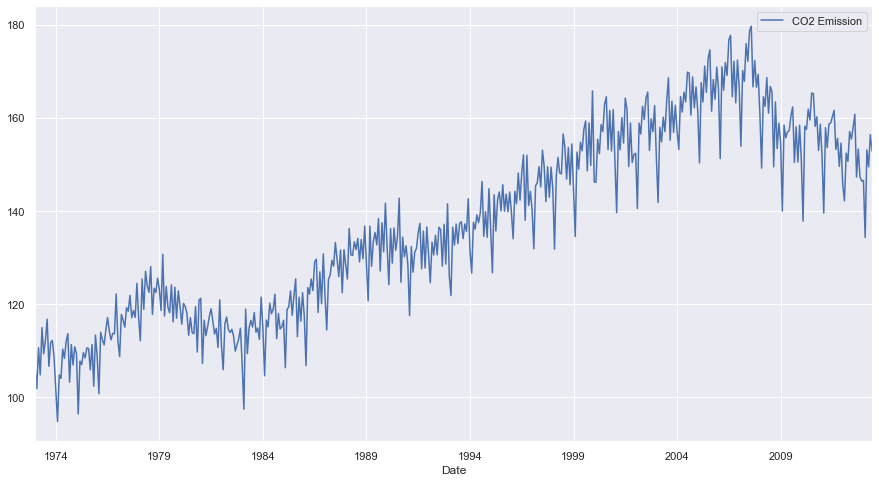

In [17]:
df.plot()

In [18]:
round(df.describe(),0)

,CO2 Emission
count,486.0
mean,137.0
std,20.0
min,95.0
25%,119.0
50%,136.0
75%,154.0
max,180.0


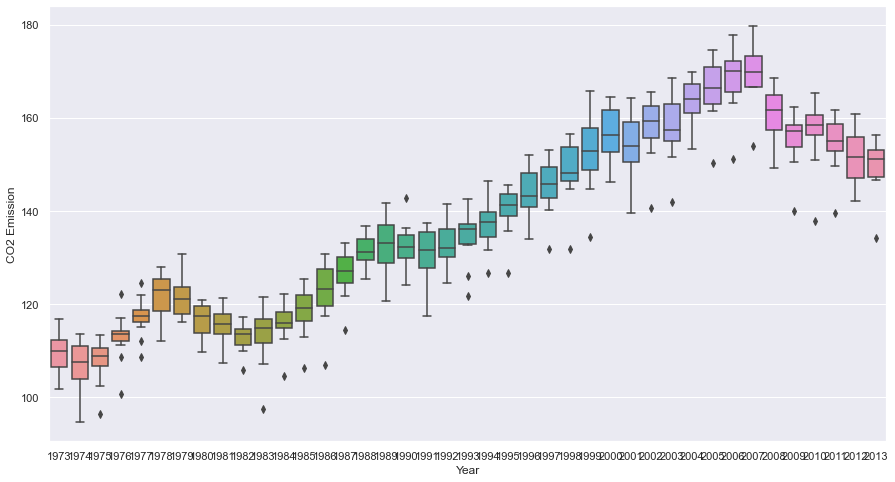

In [20]:
sns.boxplot(x=df.index.year, y = df['CO2 Emission'])
plt.xlabel('Year');

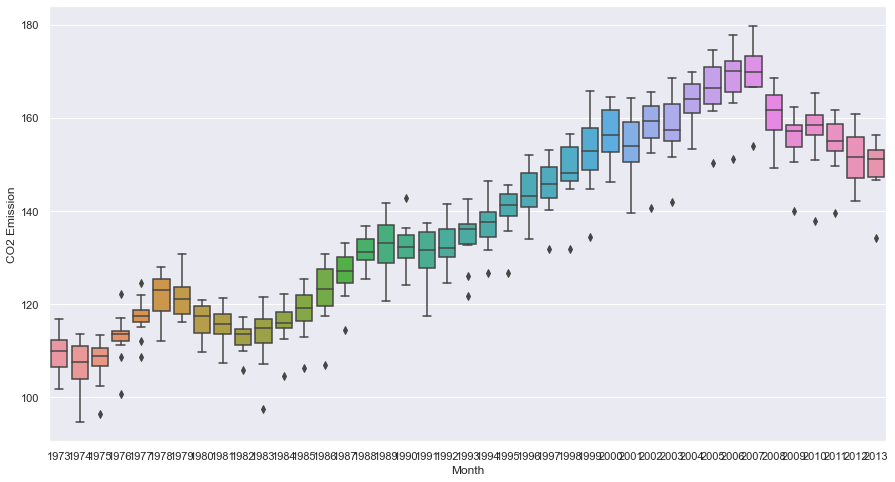

In [21]:
sns.boxplot(x=df.index.year, y = df['CO2 Emission'])
plt.xlabel('Month');

In [22]:
from statsmodels.graphics.tsaplots import month_plot

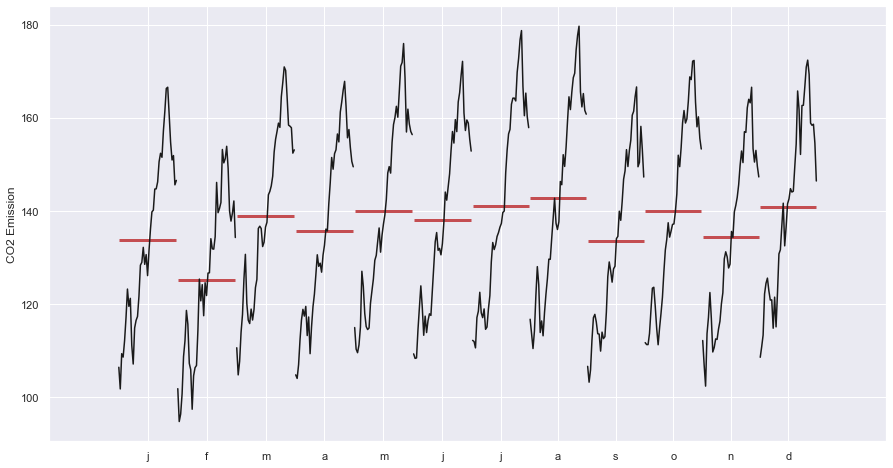

In [23]:
month_plot(df, ylabel='CO2 Emission');

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

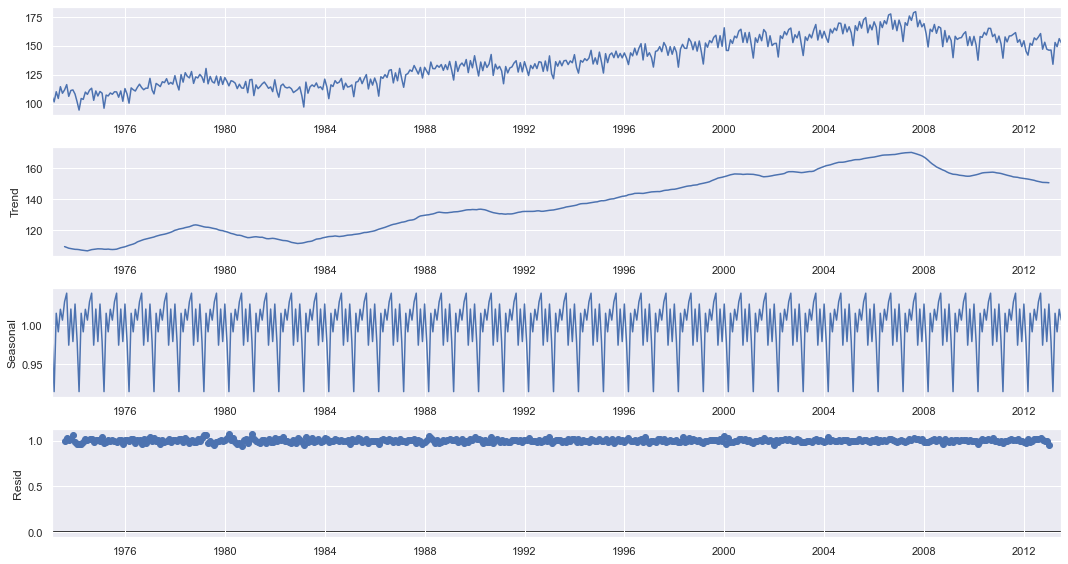

In [25]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
1973-01-31           NaN
1973-02-28           NaN
1973-03-31           NaN
1973-04-30           NaN
1973-05-31           NaN
1973-06-30           NaN
1973-07-31    109.405625
1973-08-31    108.917208
1973-09-30    108.380042
1973-10-31    108.104958
1973-11-30    107.879708
1973-12-31    107.646208
Freq: M, Name: trend, dtype: float64 

Seasonality 
 Date
1973-01-31    0.978979
1973-02-28    0.915327
1973-03-31    1.015252
1973-04-30    0.991555
1973-05-31    1.020306
1973-06-30    1.006510
1973-07-31    1.029891
1973-08-31    1.040861
1973-09-30    0.974546
1973-10-31    1.020619
1973-11-30    0.979175
1973-12-31    1.026978
Freq: M, Name: seasonal, dtype: float64 

Residual 
 Date
1973-01-31         NaN
1973-02-28         NaN
1973-03-31         NaN
1973-04-30         NaN
1973-05-31         NaN
1973-06-30         NaN
1973-07-31    0.995235
1973-08-31    1.029244
1973-09-30    1.008868
1973-10-31    1.011973
1973-11-30    1.061324
1973-12-31    0.981499
Freq: M, Name: resi

In [27]:
train = df[0:int(len(df)*0.7)] 
test = df[int(len(df)*0.7):]

In [28]:
train.shape, test.shape

((340, 1), (146, 1))

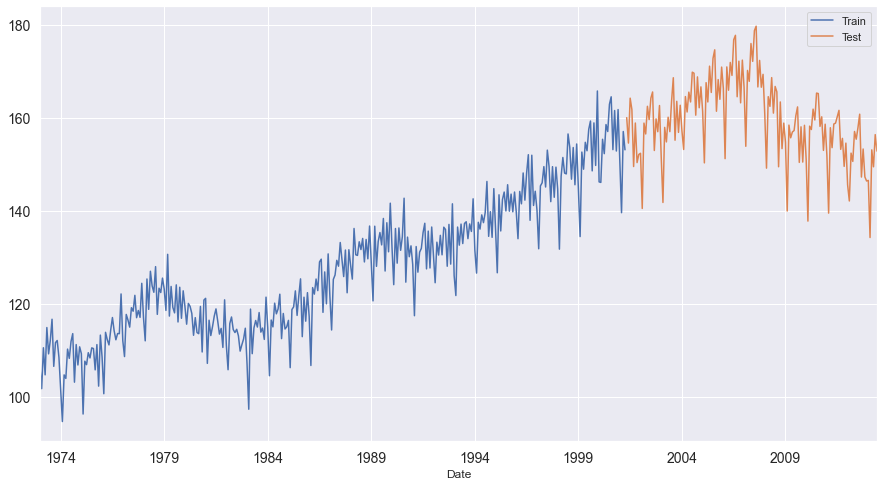

In [29]:
train['CO2 Emission'].plot(legend = True, label = 'Train', fontsize =14)
test['CO2 Emission'].plot(legend = True,label = 'Test', fontsize = 14);

In [42]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse #sklearn.metrics mse, np.sqrt, mse(squared = False)

TES_train = train.copy()
TES_test = test.copy()

In [43]:
model_TES = ExponentialSmoothing(TES_train['CO2 Emission'],
                                 trend='additive',
                                 seasonal='multiplicative',freq='M')

In [44]:
model_TES_autofit = model_TES.fit()

In [45]:
model_TES_autofit.params

{'smoothing_level': 0.3021927891461682,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 98.58151405936557,
 'initial_trend': 0.12292478926557218,
 'initial_seasons': array([1.07957479, 1.01391393, 1.12094225, 1.0915941 , 1.12264994,
        1.10788954, 1.13002213, 1.1441825 , 1.07375154, 1.12709771,
        1.07960184, 1.14105611]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [46]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test)).round(0)

TES_test.head()

,CO2 Emission,auto_predict
Date,,
2001-05-31,160.005,158.0
2001-06-30,154.542,156.0
2001-07-31,164.193,159.0
2001-08-31,161.735,161.0
2001-09-30,149.500,152.0


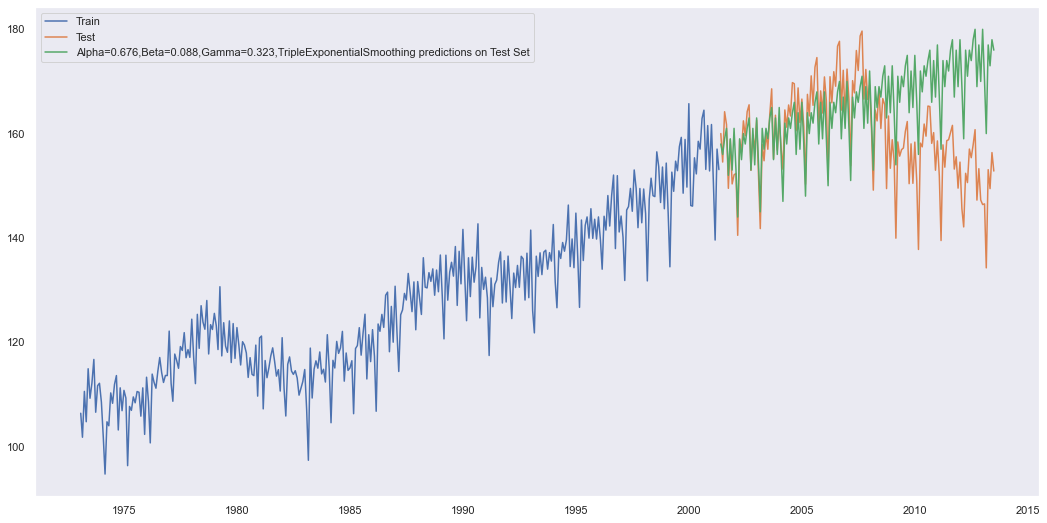

In [47]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['CO2 Emission'], label='Train')
plt.plot(TES_test['CO2 Emission'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [49]:
rmse_model6_test_1 = rmse(TES_test['CO2 Emission'],
                          TES_test['auto_predict'])
rmse_model6_test_1

11.451268445921087

In [50]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])
resultsDf_8_1

,Test RMSE
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",11.451268


In [52]:
train = df[0:int(len(df)*0.8)] 
test = df[int(len(df)*0.8):]

In [53]:
SES_train = train.copy()
SES_test = test.copy()

In [54]:
train.shape, test.shape

((388, 1), (98, 1))

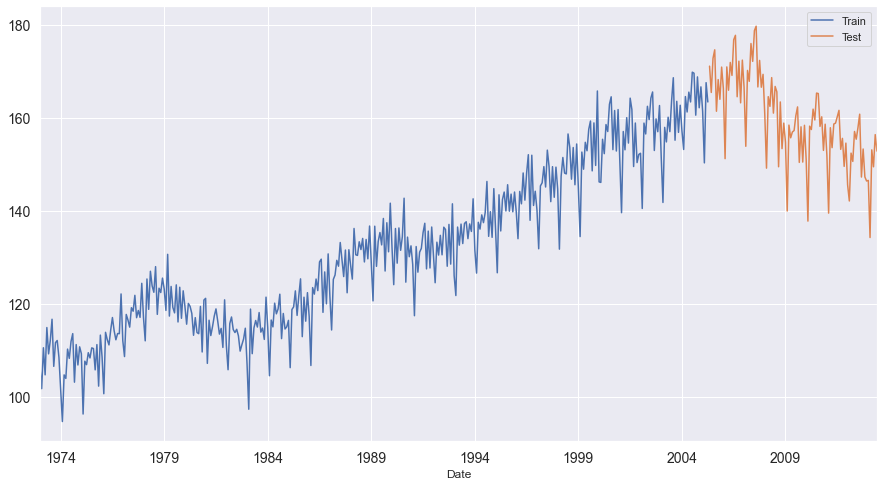

In [56]:
train['CO2 Emission'].plot(legend = True, label = 'Train', fontsize =14)
test['CO2 Emission'].plot(legend = True,label = 'Test', fontsize = 14);

In [59]:
model_SES = SimpleExpSmoothing(SES_train['CO2 Emission'], initialization_method='estimated')

In [60]:
model_SES_autofit = model_SES.fit()

In [61]:
model_SES_autofit.params

{'smoothing_level': 0.17841250303182737,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 107.89419592851547,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [62]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head().style

,CO2 Emission,predict
Date,,
2005-05-31 00:00:00,171.070000,162.671701
2005-06-30 00:00:00,165.419000,162.671701
2005-07-31 00:00:00,172.746000,162.671701
2005-08-31 00:00:00,174.577000,162.671701
2005-09-30 00:00:00,161.380000,162.671701


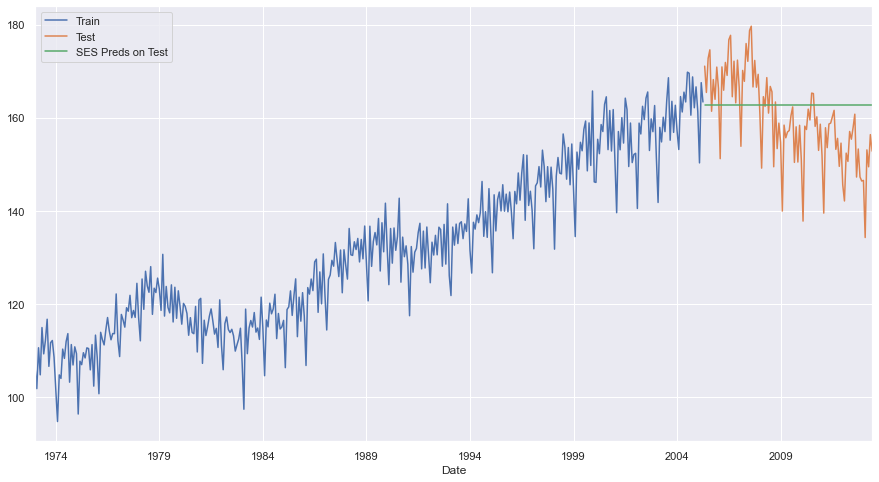

In [64]:
SES_train['CO2 Emission'].plot(legend=True, label = 'Train')
SES_test['CO2 Emission'].plot(legend=True, label = 'Test')
SES_test['predict'].plot(legend=True, label = 'SES Preds on Test');

In [66]:
## Test Data

rmse_model5_test_1 = rmse(SES_test['CO2 Emission'],SES_test['predict'])
rmse_model5_test_1

9.922371002930078

In [80]:
DES_train = train.copy()
DES_test = test.copy()

In [81]:
model_DES = Holt(DES_train['CO2 Emission'], initialization_method='estimated')

In [94]:
model_DES_alpha = model_DES.fit(optimized=True)

In [95]:
DES_train['predict'] = model_DES_alpha.fittedvalues
DES_test['predict'] = model_DES_alpha.forecast(steps=18)

In [99]:
rmse_model6_train = rmse(DES_train['CO2 Emission'],DES_train['predict'])
rmse_model6_train


5.449232923733893

In [100]:
        
rmse_model6_test = rmse(DES_test['CO2 Emission'],DES_test['predict'])
rmse_model6_test

nan

In [98]:
model_DES.params

{'smoothing_level': 0.113573458743693,
 'smoothing_trend': 0.11357345874369278,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 108.74436892541827,
 'initial_trend': -0.12974446976772347,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [93]:
DES_test['predict'] = des.fittedvalues(steps=len(test))
DES_test.head().style

TypeError: 'Series' object is not callable

In [84]:
rmse_model5_test_2 = rmse(DES_test['CO2 Emission'],DES_test['predict'])
rmse_model5_test_2

9.922371002930078

In [85]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [86]:
alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
beta_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [71]:
for i in alpha_list:
    for j in beta_list:
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j)
        
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = rmse(DES_train['CO2 Emission'],DES_train['predict',i,j])
        
        rmse_model6_test = rmse(DES_test['CO2 Emission'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,
                                          'Beta Values':j,
                                          'Train RMSE': rmse_model6_train,
                                          'Test RMSE': rmse_model6_test}, ignore_index=True)

In [72]:
resultsDf_7.style

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.300000,0.300000,6.090328,nan
1,0.300000,0.400000,6.310148,nan
2,0.300000,0.500000,6.537064,nan
3,0.300000,0.600000,6.747963,nan
4,0.300000,0.700000,6.911020,nan
5,0.300000,0.800000,7.001280,nan
6,0.300000,0.900000,7.018831,nan
7,0.300000,1.000000,6.989486,nan
8,0.400000,0.300000,6.261227,nan
9,0.400000,0.400000,6.445588,nan


In [101]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit(optimized=True)

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.113573458743693, 'smoothing_trend': 0.11357345874369278, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 108.74436892541827, 'initial_trend': -0.12974446976772347, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [102]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

2005-05-31    165.035086
2005-06-30    165.270090
2005-07-31    165.505093
2005-08-31    165.740097
2005-09-30    165.975100
                 ...    
2013-02-28    186.890409
2013-03-31    187.125412
2013-04-30    187.360416
2013-05-31    187.595419
2013-06-30    187.830423
Freq: M, Length: 98, dtype: float64

In [103]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

2005-05-31    165.035086
2005-06-30    165.270090
2005-07-31    165.505093
2005-08-31    165.740097
2005-09-30    165.975100
                 ...    
2013-02-28    186.890409
2013-03-31    187.125412
2013-04-30    187.360416
2013-05-31    187.595419
2013-06-30    187.830423
Freq: M, Length: 98, dtype: float64

In [105]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 22.404019961350947


In [113]:
train = df[0:int(len(df)*0.8)] 
test = df[int(len(df)*0.8):]

In [114]:
train = np.log(train)

In [115]:
test = np.log(test)

In [116]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [117]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [118]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.18098122000994507,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 4.680413948971231,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [119]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

2005-05-31    5.091121
2005-06-30    5.091121
2005-07-31    5.091121
2005-08-31    5.091121
2005-09-30    5.091121
                ...   
2013-02-28    5.091121
2013-03-31    5.091121
2013-04-30    5.091121
2013-05-31    5.091121
2013-06-30    5.091121
Freq: M, Length: 98, dtype: float64

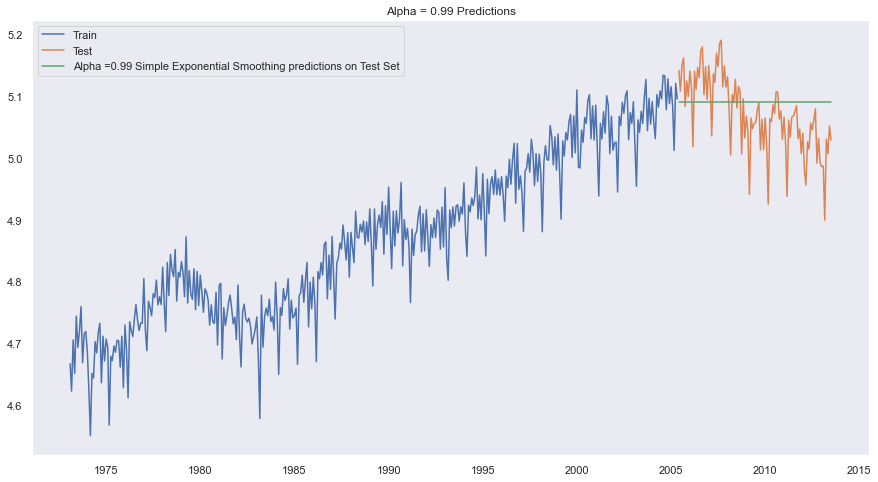

In [120]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [121]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 0.06295357068648283
SES RMSE (calculated using statsmodels): 0.06295357068648283
